# Introduction to Regression using TB Dataset

## Introduction

In this example you will learn to apply linear regression modules using the Python scikit-learn package. In particularly;

1. Understand the basics of applying regression models for prediction. 
2. Evaluate the performance of regression models. 
2. Apply a recipe for using scikit-learn to define, train and test machine learning models. 

## Overview of regression

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression models attempt to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explanatory variables** or **features**. Single regression has one label used to predict one feature. Multiple regression uses two or more feature variables. 

In mathematical form the goal of regression is to find a function of some features $X$ which predicts the label value $y$. This function can be written as follows:

$$\hat{y} = f(X)$$

The challenge in regression is to **learn** the function $f(X)$ so that the predictions of $\hat{y}$ are accurate. In other word, we train the model to minimize the difference between our predicted $\hat{y}$ and the known label values $y$. In fact, the entire field of **supervised learning** has this goal 

Many machine learning models, including some of the latest deep learning methods, are a form of regression. There methods often suffer from the same problems, including overfitting and mathematically unstable fitting methods. 


### Overview of linear regression
 
The simplest case of linear regression is know as **single regression**, since there is a single feature. The function $f(X)$ is **linear in the model coefficients**. For a single vector of features $x$ the linear regression equation is written as follows:

$$\hat{y} = a \cdot x + b$$

The model coefficients are $a$, which we call the **slope** and $b$, which we call the **intercept**. Notice that this is just the equation of a straight line for one variable. 

But, what are the best values of $a$ and $b$? In linear regression, $a$ and $b$ are chosen to minimize the squared error between the predictions and the known labels. This quantity is known as the **sum squared error** or SSE. For $n$ **training cases** the SSE is computed as follows:

$$MSE = \sum_{i=1}^n \big( f(x_i) - y_i \big)^2\\
= \sum_{i=1}^n \big( \hat{y}_i - y_i \big)^2\\
= \sum_{i=1}^n \big( a \cdot x_i + b - y_i \big)^2$$

The approach to regression that minimizes SSE is know as the **method of least squares**.

### Execute a first linear regression example using WHO TB burden estimates



WHO TB burden estimates is a detailed dataset This includes WHO-generated estimates of TB mortality, incidence (including disaggregation by age and sex and incidence of TB/HIV), case fatality ratio, treatment coverage (previously called case detection rate), proportion of TB cases that have rifampicin-resistant TB (RR-TB, which includes cases with multidrug-resistant TB, MDR-TB), RR/MDR-TB among notified pulmonary TB cases and latent TB infection among children aged under 5.

However we will build a model to predict ***the estimated tb incurrence*** given ***the estimated population***.

We go ahead and load the required packages and WHO TB burden estimates data used in the analysis.

In [1]:
#importing required packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
import math
plt.style.use('ggplot')

#loading the dataset
all_tb = pd.read_csv ('https://raw.githubusercontent.com/waithiegeni/python_analysis/master/TB_burden_countries_2019-01-11.csv', encoding = 'utf-8')

After loading the data, I'm going to select the columns are will require in this example. **I'm interested in two columns** . Estimated population and Estimated tb incurrance (All forms) . 

In [2]:
#selecting rows to fit a simple linear regression
all_tb = all_tb[["e_pop_num", "e_inc_num"]]

Checking if there is any linear regression relationship between this two variables. Note I'm using **e_pop_num** as the independent variable and **e_inc_num** as the dependent variable.

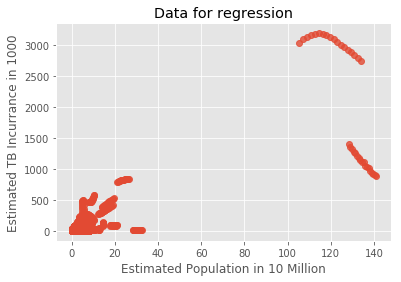

In [3]:
sns.regplot((all_tb.e_pop_num/10000000),(all_tb.e_inc_num/1000), fit_reg = False)
plt.xlabel('Estimated Population in 10 Million')
plt.ylabel('Estimated TB Incurrance in 1000')
plt.title('Data for regression')
plt.show()

There its evident there are some outliers, but for the Estimated tb incurrance of less than 500,000 the data has a straight line trend. However, there is some dispersion of these data as a result of the addition of the Normally distributed noise.

I will go ahead and exclude the outliers . [Check out this discussion](https://stats.stackexchange.com/questions/175/how-should-outliers-be-dealt-with-in-linear-regression-analysis) 

In [4]:
#excluding the outlines
no_outliers_tb = all_tb[all_tb.e_inc_num <= 500000]

#scale the dataset
no_outliers_tb["e_pop_num"] = no_outliers_tb["e_pop_num"]/1000000
no_outliers_tb["e_inc_num"] = no_outliers_tb["e_inc_num"]/1000

#describe the data
no_outliers_tb.describe().round(0)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,e_pop_num,e_inc_num
count,3785.0,3785.0
mean,18753631.0,25129.0
std,36581747.0,66528.0
min,1126.0,0.0
25%,645659.0,200.0
50%,5439695.0,2800.0
75%,18734987.0,16000.0
max,324459463.0,500000.0


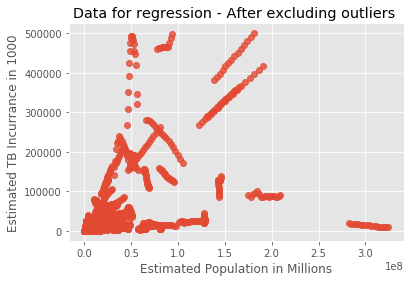

In [5]:
sns.regplot(no_outliers_tb.e_pop_num,no_outliers_tb.e_inc_num, fit_reg = False)
plt.xlabel('Estimated Population in Millions')
plt.ylabel('Estimated TB Incurrance in 1000')
plt.title('Data for regression - After excluding outliers ')
plt.show()

#### Split the dataset

When performing any type of machine learning, good data preparation is required to ensure good model performance. Poor data preparation is often the source of poor machine learning model performance. 

The first step in preparing these data is to create **independently sampled** **training dataset** and **test data set**. In most cases, an independently sampled **evaluation dataset** will also be used. In this case, no model improvement or comparison will be performed so this additional step is unnecessary. 

If the same data are used to train and test a machine learning model, there is a high likelihood that the model will simply be learning the training data. In technical terms one can say that there is **information leakage** between the training and test processes. In this case, the model may not **generalize** well. A model that generalizes well produces consistent results when presented with new cases, never before encountered. Conversely, a model with poor generalization might give unexpected results when presented with a new case. 

The random sub-samples of the data are created using a process called **Bernoulli sampling**. Bernoulli sampling accepts a sample into the data subset with probability $p$. In this case, the probability that a given case is in the training dataset is $p$. The probability a case is in the test dataset then becomes $1-p$. 

The `train_test_split` function from the `sklearn.model_selection` module performed the required Bernoulli sampling. The `train_test_split` function samples the index for the array containing the features and label values. The code in the cell below performs this split.

In [6]:
#spliting the data into training and test data
#training data
tb_training_data = no_outliers_tb.sample(frac = 0.7)
#testing data
#testing the data set
tb_test_data = no_outliers_tb.sample(frac = 0.3)

#### Scale numeric features

Now that the dataset is split, the numeric feature column must be re-scaled. Rescaling of numeric features is extremely important. The numeric range of a feature should not determine how much that feature determines the training of the machine learning model. 

For example, consider a data set with two features, age in years, typically measured in a few tens, and income, typically measured in tens or hundreds of thousands. There is no reason to believe that income is more important than age in some model, simply because its range of values is greater. To prevent this problem numeric features are scaled to the same range. 

There are many possible scaling methods. One simple method is known as **Min-Max** normalization. The data are scaled using the following formula to be in the range $\{ 0,1 \}$:

$$x\_scaled_i = \frac{(x_i - Min(x))}{(Max(x) - Min(x))}$$

where,
$x_i $ is the ith sample value,
$Min(X) $ is the minimum value of all samples,
$Max(X) $ is the maximum value of all samples.

In general, Min-Max normalization is a good choice for cases where the value being scaled has a complex distribution. For example, a variable with a distribution with multiple modes might be a good candidate for Min-Max normalization. Notice that the presence of a few outliers can distort the result by giving unrepresentative values of $Min(X)$ or $Max(X)$.


For this lab you will use **Z-Score** normalization. Z-Score normalization transforms a variable so that it has zero mean and unit standard deviation (or variance). Z-Score normalization is performed using the following formula:

$$x\_scaled_i = \frac{\big(x_i - \mu \big)}{\sigma}$$

where,
$\mu $ is the mean of the variable $X$,
$\sigma $ is the standard deviation of the variable $X$.

The code in the cell below uses the `StandardScaler` function from the `sklearn.preprocessing` package. This function computes the scaling coefficients for the training data. The resulting transformation is then applied to the training and test data using the `transform` method. 

Notice that the scaling transform is computed only on the training data. The scaling transform should always be computed on the training data, not the test or evaluation data. 

Generally, a numeric label does not need to be scaled. Other transformations may be required, however. 

Execute the code in the cell below that applies the Z-Score transformation to the training and test feature.

In [7]:
#muting warning
import warnings
warnings.filterwarnings('ignore')

#actual code running
scaler = preprocessing.StandardScaler().fit(np.asarray(tb_training_data["e_pop_num"]).reshape(-1,1))
pop_num_train = scaler.transform(np.asarray(tb_training_data["e_pop_num"]).reshape(-1,1))     
inc_num_train = scaler.transform(np.asarray(tb_training_data["e_inc_num"]).reshape(-1,1))     


## Train the regression model

With the data prepared, it is time to train a regression model. This is done with the `sklearn.linear_model` package. The steps for training most scikit-learn models are the same as used here:

1. A model object is instantiated. Additional model specification can be performed at instantiation time.
2. The model is fit using a numpy array of the features and the labels. In this case, there is only one feature so the `reshape` method is used to create an array of the correct dimension.

You can follow this link to find additional [documentation on linear regression models with scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares). 

In [8]:
#fitting the linear model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(pop_num_train .reshape(-1,1), inc_num_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

As a first verification of this model you can print the model coefficients.

In [ ]:
#print the co-efficients
print(lin_mod.intercept_)
print(lin_mod.coef_)


Next, you will plot the predicted values computed from the training features. The `predict` method is applied to the model with the training data. A plot of the raw label values and the line of the predicted values or **scores** is then displayed. Execute the code and examine the results. 

In [ ]:
def plot_regression(x, y_score, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_score, c = 'blue')
    plt.xlabel('e_pop_num')
    plt.ylabel('Y')
    plt.title('Fit of model to test data')

e_inc_num_score = lin_mod.predict(np.asarray(tb_test_data.e_pop_num).reshape(-1,1))

plot_regression(tb_test_data.e_pop_num, e_inc_num_score , tb_test_data.e_inc_num)


## Evaluate model performance

With the model trained, it is time to evaluate the performance. This is done using the test dataset, so that there is no information leakage from the model training. 

As a first step, a set of performance metric are computed. There are many possible metrics used for the evaluation of regression models. Generally, these metrics are functions of the **residual value**, or difference between the predicted value or score and actual label value:

$$r_i = f(x_i) - y_i = \hat{y}_i - y_i$$

In this lab, you will work with some of the more common metrics:

- **Mean squared error** or MSE,  
$$MSE = \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2$$

The mean squared error is identical to the variance of the residuals (with a slight bias). Recall that this metric is the one linear regression minimizes. Notice that mean square error is in units of the square of the label values.   

- **Root mean squred error** or RMSE,  
$$RMSE = \sqrt{ \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2}$$

The root mean squared error is identical to the standard deviation of the residuals (again, with a slight bias). Root mean square error is in the same units as the label values.  

- **Mean absolute error** or MAE,
$$MAE = \frac{1}{N} \sum_{i=1}^N |f(x_i) - y_i|$$  
where $||$ is the absolute value operator.  

The similar in interpretation to the root mean squared error. You may find this measure more intuitive since it is simply the average of the magnitude of the residuals.   

- **Median absolute error**,
$$Median\ Absolute\ Error = Median \big( \sum_{i=1}^N |f(x_i) - y_i| \big)$$   

The median absolute error is a robust measure of the location parameter of the absolute residuals. If this measure is significantly different from the mean absolute error, it is likely that there are outliers in the residuals. 

- **R squared or $R^2$**, also known as the **coefficient of determination**,  
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$  
where,   
$SS_{res} = \sum_{i=1}^N r_i^2$, or the sum of the squared residuals,   
$SS_{res} = \sum_{i=1}^N y_i^2$, or the sum of the squared label values.  

In other words, $R^2$ is  measure of the reduction in sum of squared values between the raw label values and the residuals. If the model has not reduced the sum of squares of the labels (a useless model!), $R^2 = 0$. On the other hand, if the model fits the data perfectly so all $r_i = 0$, then $R^2 = 1$. 

- **Adjusted R squared or $R^2_{adj}$** is $R^2$ adjusted for degrees of freedom in the model,
$$R^2_{adj} = 1 - \frac{var(r)}{var(y)} = 1 - \frac{\frac{SS_{res}}{(n - p -1)}}{\frac{SS_{tot}}{(n-1)}}$$  
where,   
$var(r) = $ the variance of the residuals,   
$var(y) = $ the variance of the labels,
$n = $ the number of samples or cases,
$p = $ number of model parameters.  

The interpretation of $R^2_{adj}$ is the same as $R^2$. In many cases there will be little difference. However if the number of parameters is significant with respect to the number of cases, $R^2$ will give an overly optimistic measure of model performance. In general, the difference between $R^2_{adj}$ and $R^2$ becomes less significant as the number of cases $n$ grows. However, even for 'big data' models there can be a significant difference if there are a large number of model parameters.   

****
**Note:** Is it possible to get values of $R^2$ outside the range $\{ 0,1 \}$? Ordinarily no. But there are exceptions.   

$R^2$ can only be greater than $1$ in degenerate cases. For example, if all label values are the same. But, in this case, you do not need a model to predict the label!

What if you find your model gives an $R^2$ less than $0$? What can this possibly mean? This invariably means that there is a bug in your code and that the residuals of your model have greater dispersion than the original labels!
****

The code in the cell below uses functions from the `sklearn.metrics` package to compute some common metrics. There is no function for $R^2_{adj}$ in `sklearn.metrics`, but the adjustments for degrees of freedom are easily computed. 

You can follow this link to find additional [documentation on linear regression merics built into scikit-learn](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).   


In [ ]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
print_metrics(tb_test_data.e_inc_num, e_inc_num_score, 2)    

How can you interpret these results:
- The MSE and RMSE are slightly high . There is variation between predicted values and the actual values.
- The MAE and median absolute error have small values and are not close together, indicating there is significant outliers in the residuals. 
- The $R^2_{adj}$ and $R^2$ are both fairly close to one, indicating that the model is making useful predictions that are much better than the simple average of the label values.

The residuals of a linear regression model should have an approximately Normal distribution. This condition can be easily tested using graphical methods, specifically a histogram and a Quantile-Quantile Normal plot. 

****
**Note:** A common misconception is that the features or label of a linear regression model must have Normal distributions. This is not the case! Rather, the residuals (errors) of the model should be Normally distributed.   
****  

In [ ]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(np.asarray(tb_test_data.e_inc_num), e_inc_num_score)    

Another useful plot is the **Quantile-Quantile Normal plot**, or Q-Q Normal plot. This plot displays quantiles of a standard Normal distribution on the horizontal axis and the quantiles of the residuals on the vertical axis. If the residuals were perfectly Normally distributed, these points would fall on a straight line. In real-world problems, you should expect the straight line relationship to be approximate. 

In [ ]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    
resid_qq(np.asarray(tb_test_data.e_inc_num), e_inc_num_score)    

***
**Not a good Model**
***